In [148]:
%pylab inline

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\Anastasia\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##### датасет для задачи регрессии Boston Housing, 

##### необходимо предсказать стоимость дома по 13 признакам.

In [149]:
data = datasets.load_boston()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y = data.target

In [150]:
print(data.DESCR[:1500])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [151]:
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [152]:
df.groupby('CHAS').count()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CHAS,,,,,,,,,,,,
0.0,471,471,471,471,471,471,471,471,471,471,471,471
1.0,35,35,35,35,35,35,35,35,35,35,35,35


____________

##### 1. Исследовать данные. (1 балл)

нарисовать 13 картинок, которые покажут зависимость целевой переменной (таргета, игрека, y) от каждого из признаков.

Hint. используйте https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

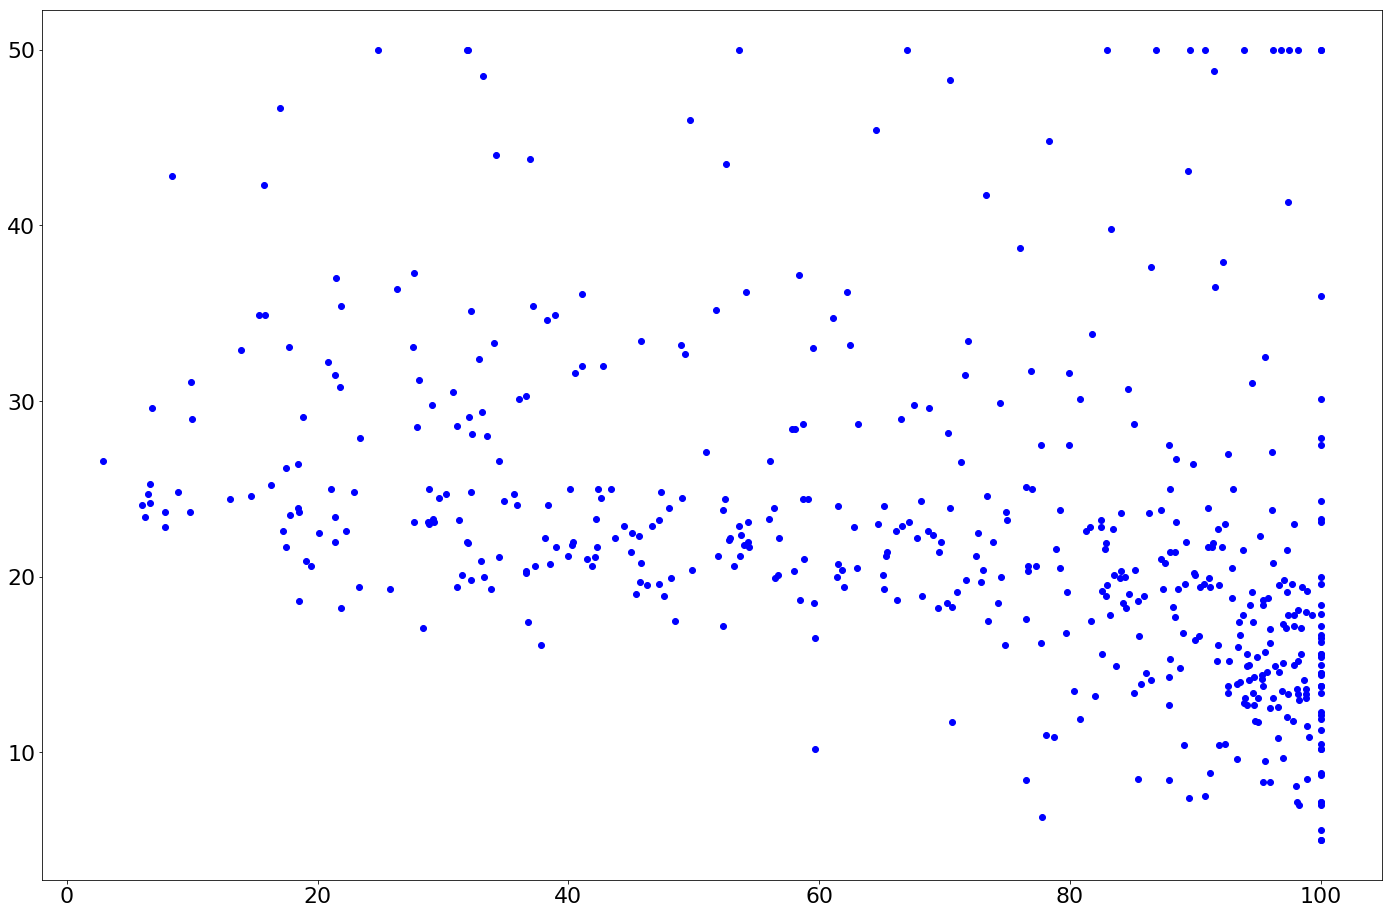

In [153]:
import pylab
pylab.rcParams['figure.figsize'] = (24.0, 16.0)
plt.rcParams.update({'font.size': 22})
plt.scatter(df.AGE.values, y, c='b', alpha = 1)
plt.show()

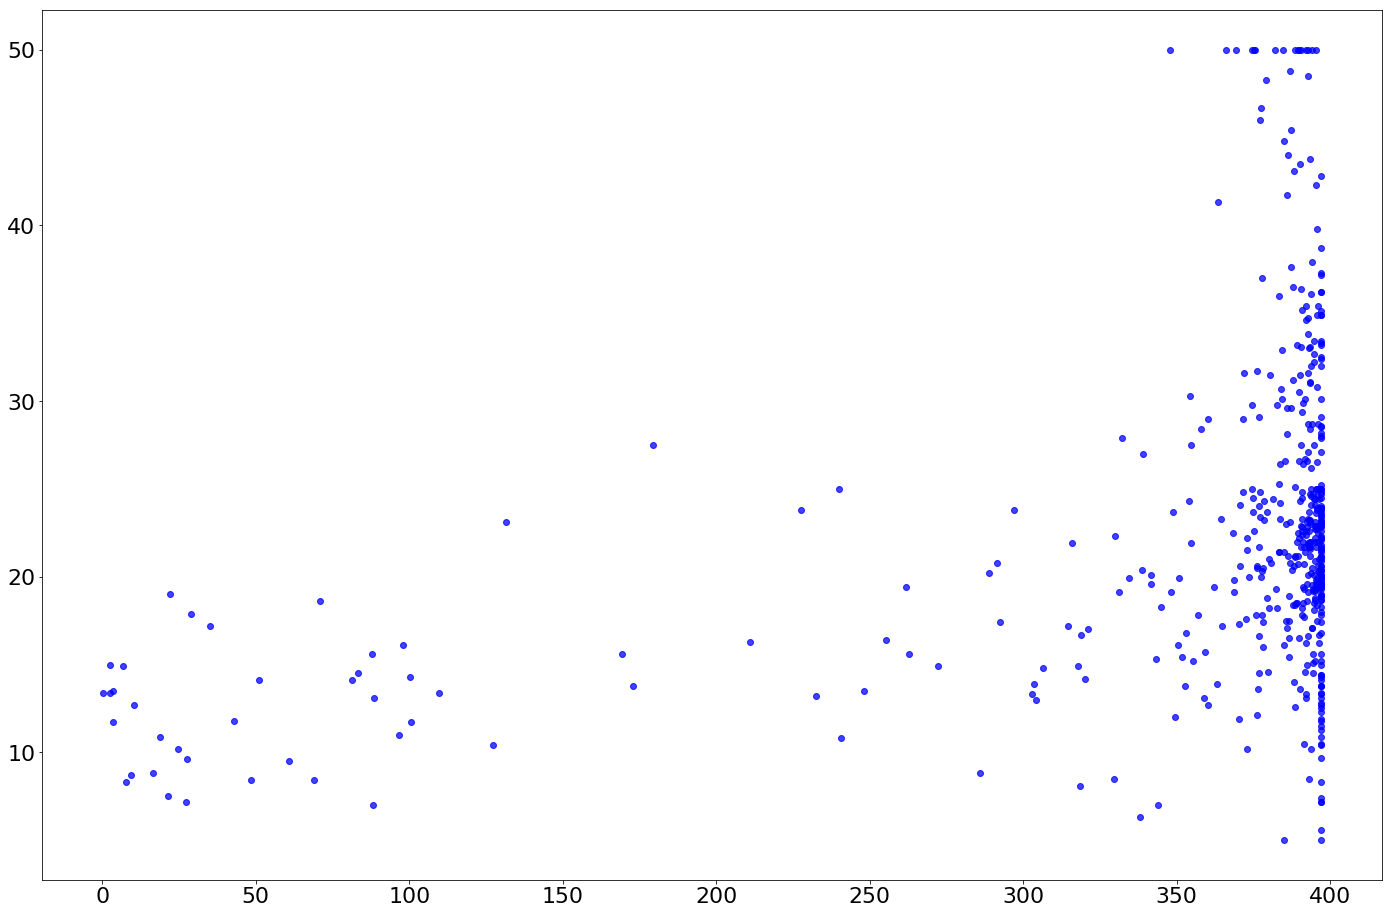

In [154]:
plt.scatter(df.B.values, y, c='b', alpha = 0.75)
plt.show()

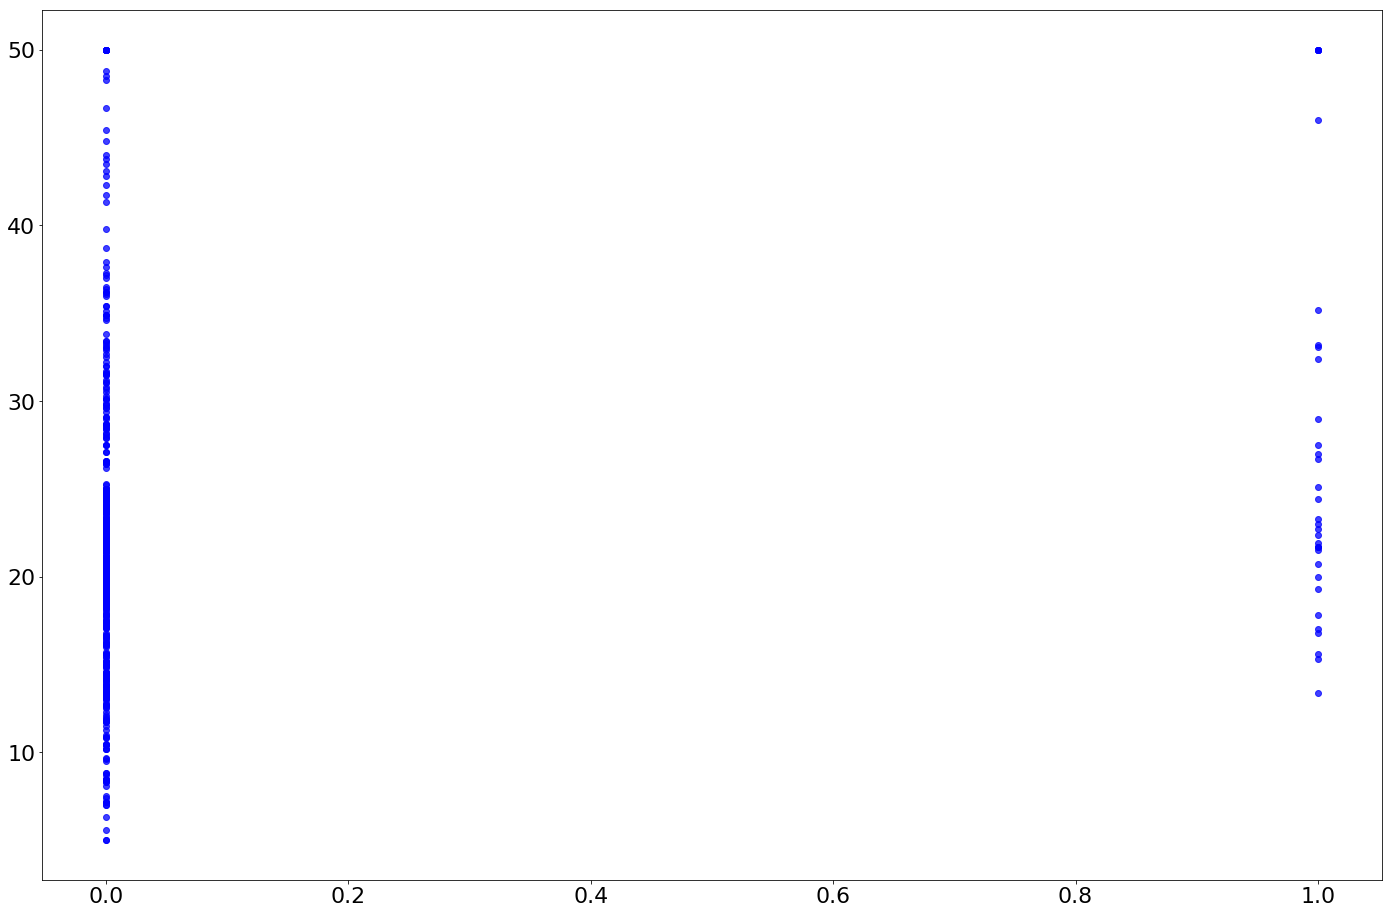

In [155]:
plt.scatter(df.CHAS.values, y, c='b', alpha = 0.75)
plt.show()

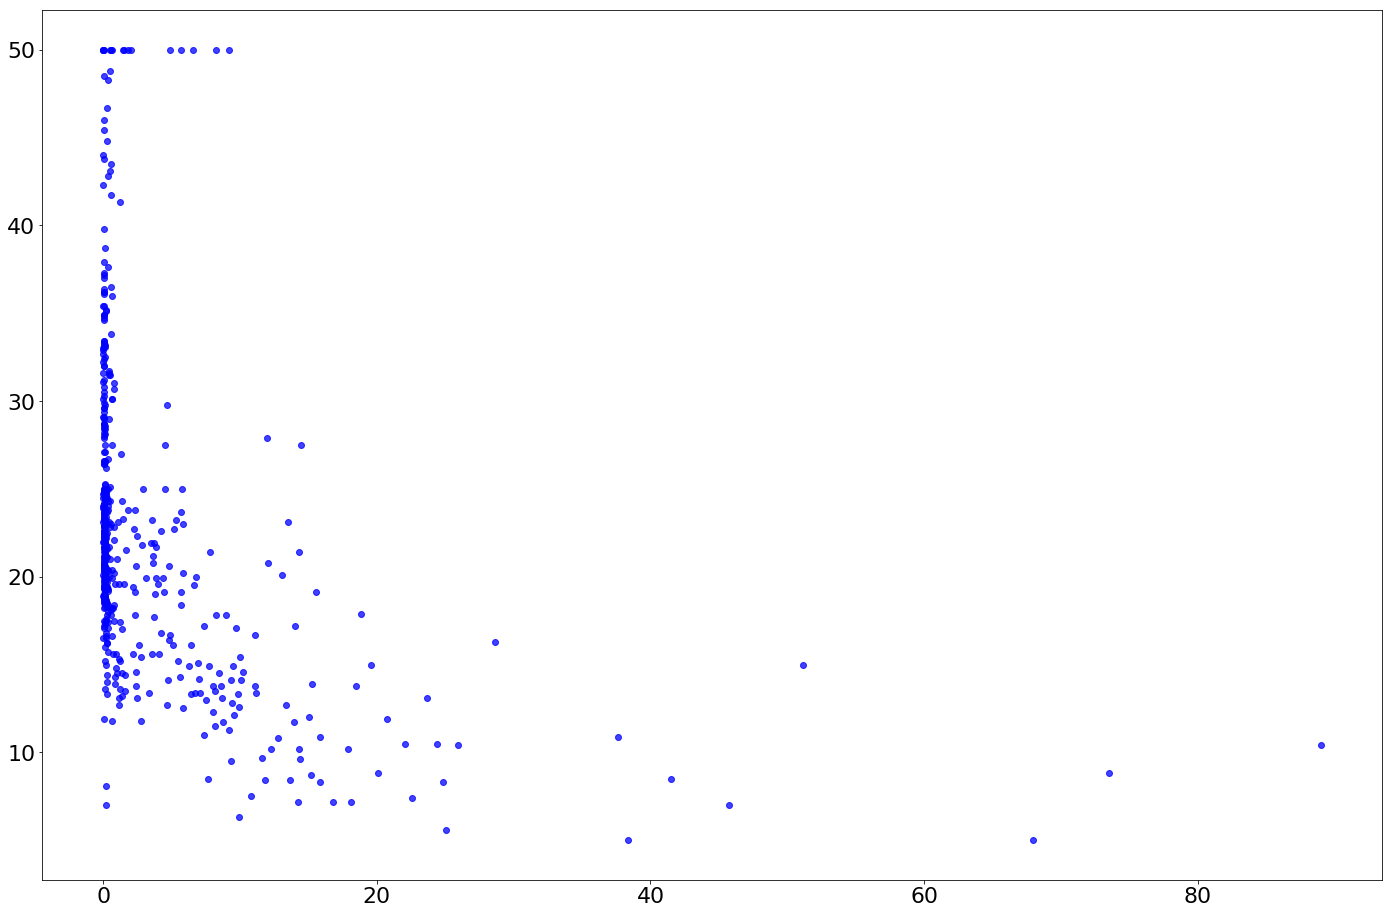

In [156]:
plt.scatter(df.CRIM.values, y, c='b', alpha = 0.75)
plt.show()

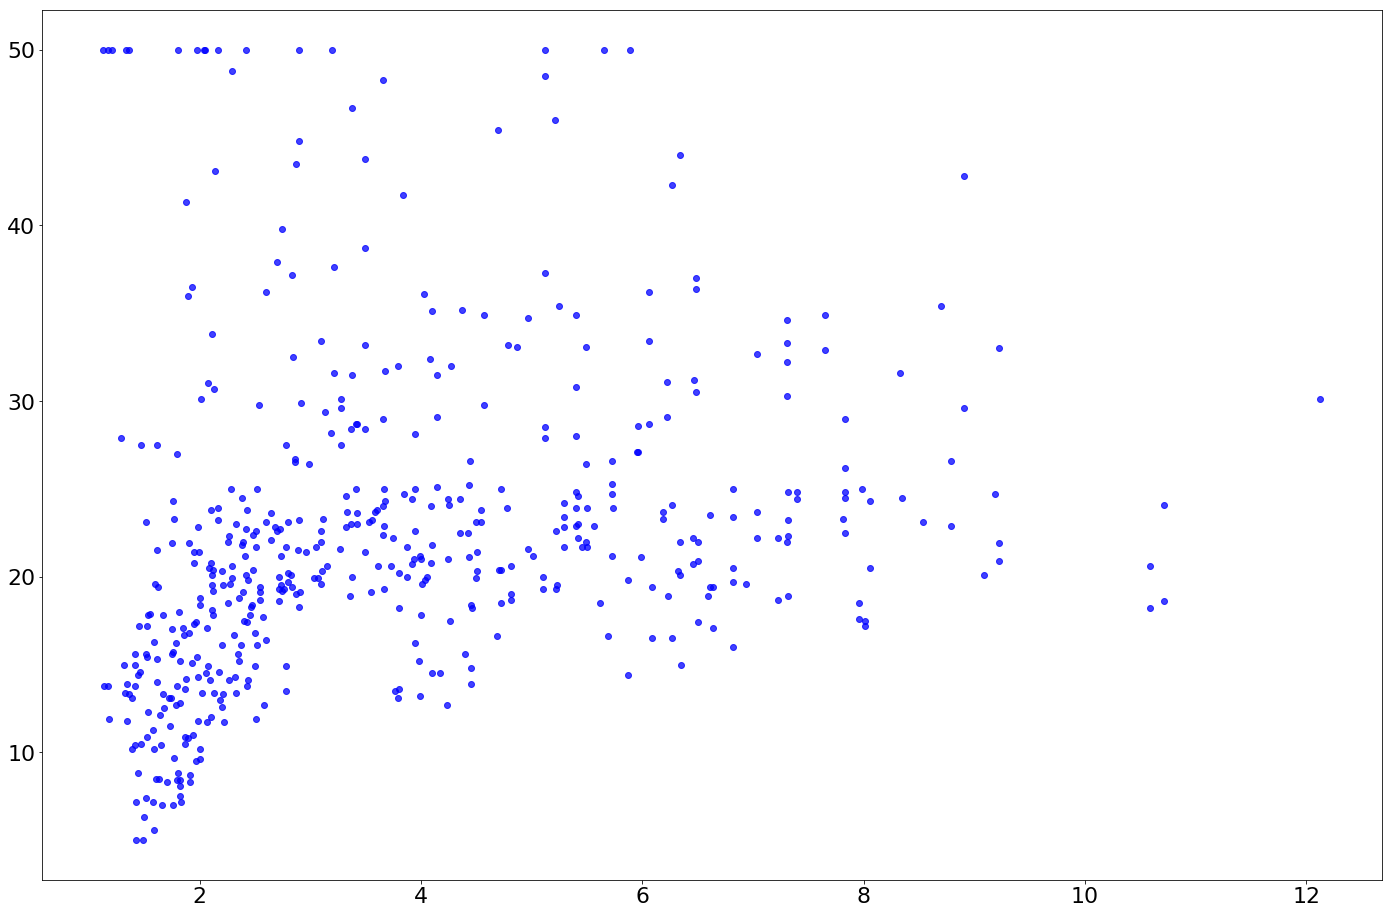

In [157]:
plt.scatter(df.DIS.values, y, c='b', alpha = 0.75)
plt.show()

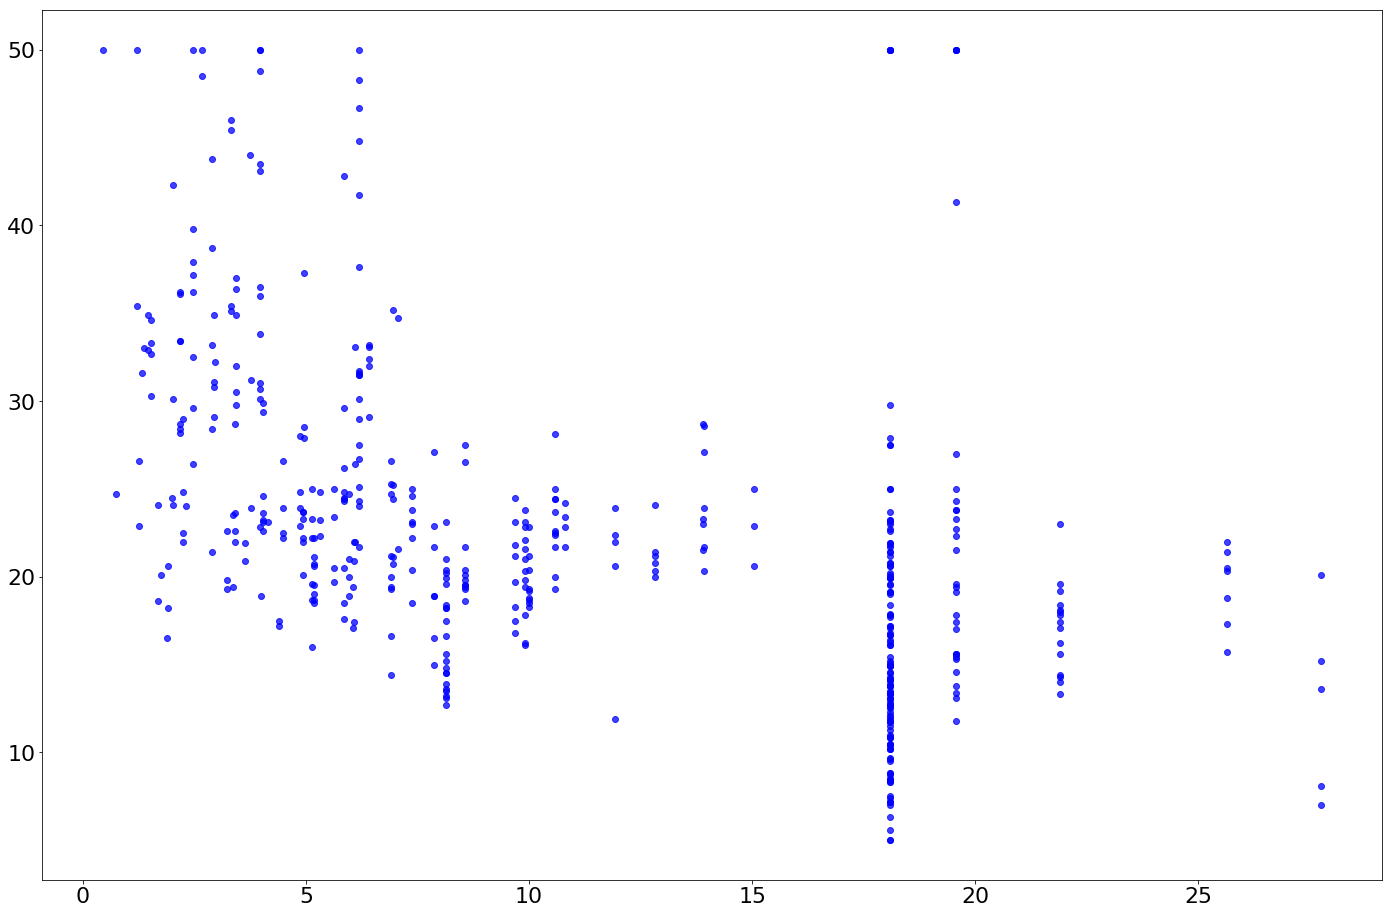

In [158]:
plt.scatter(df.INDUS.values, y,  c='b', alpha = 0.75)
plt.show()

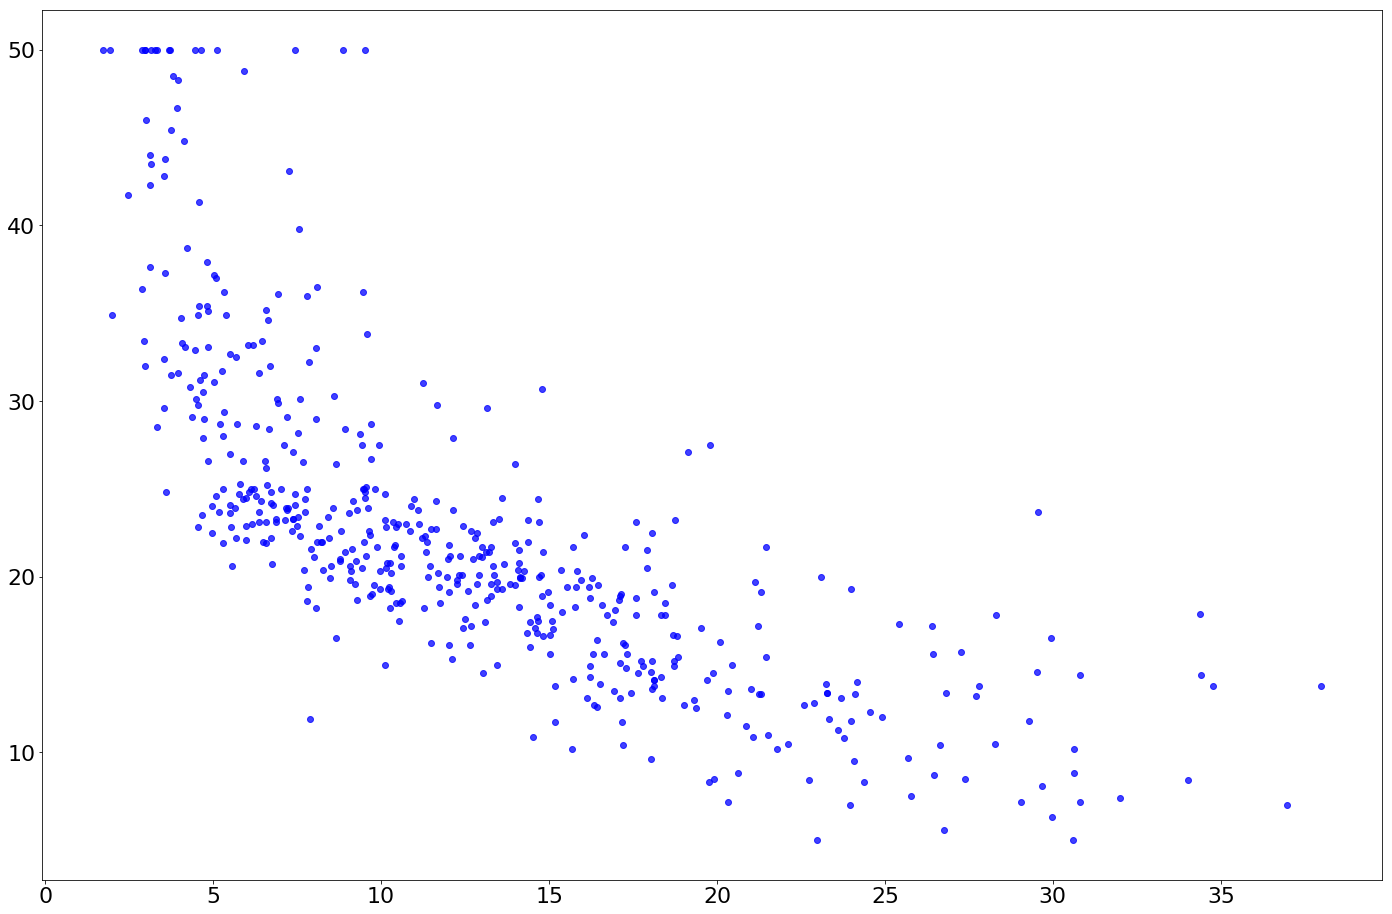

In [159]:
plt.scatter(df.LSTAT.values, y,  c='b', alpha = 0.75)
plt.show()

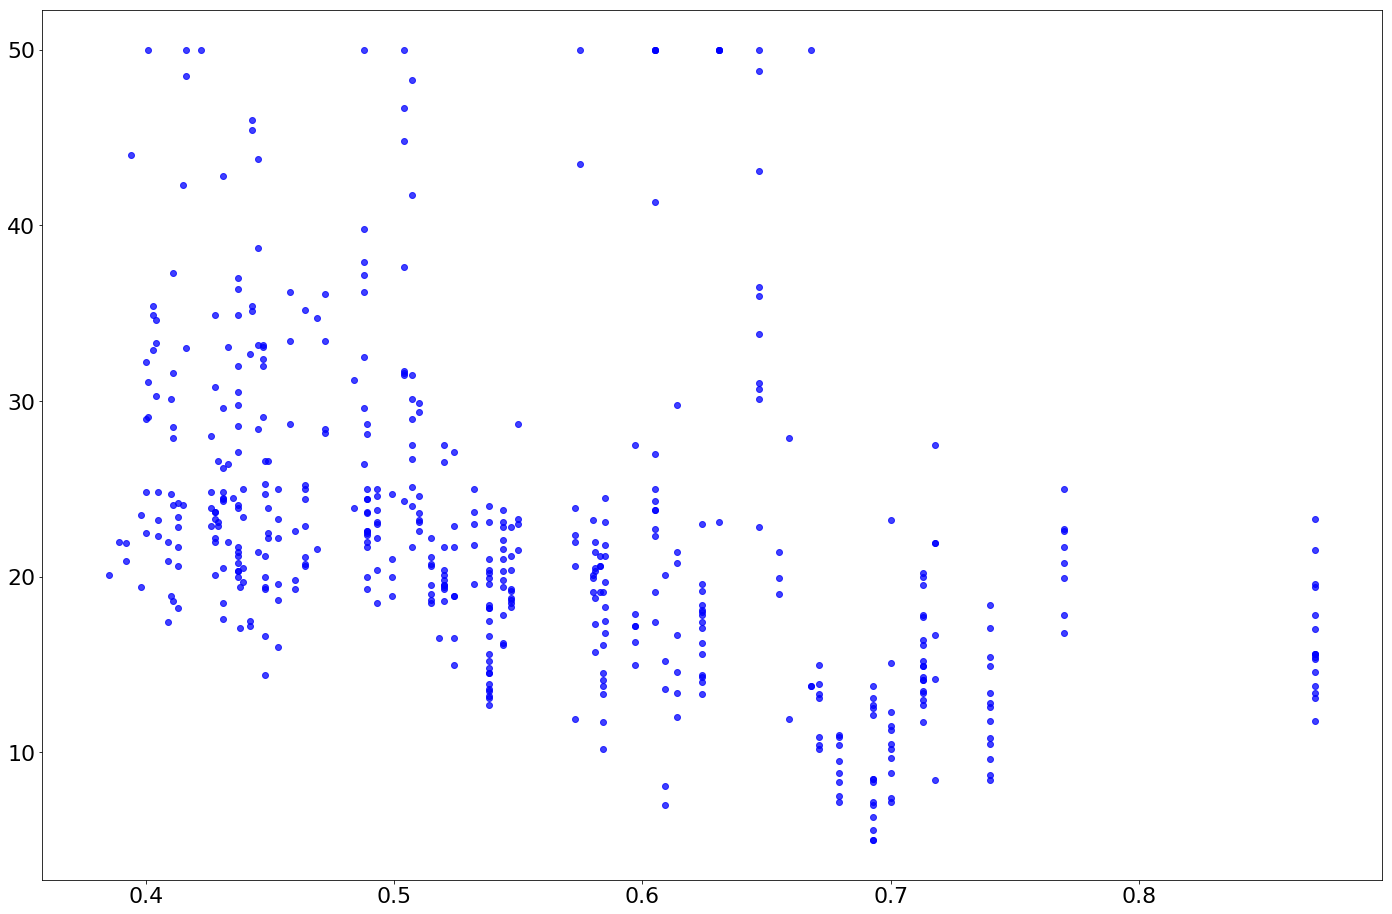

In [160]:
plt.scatter(df.NOX.values, y,  c='b', alpha = 0.75)
plt.show()

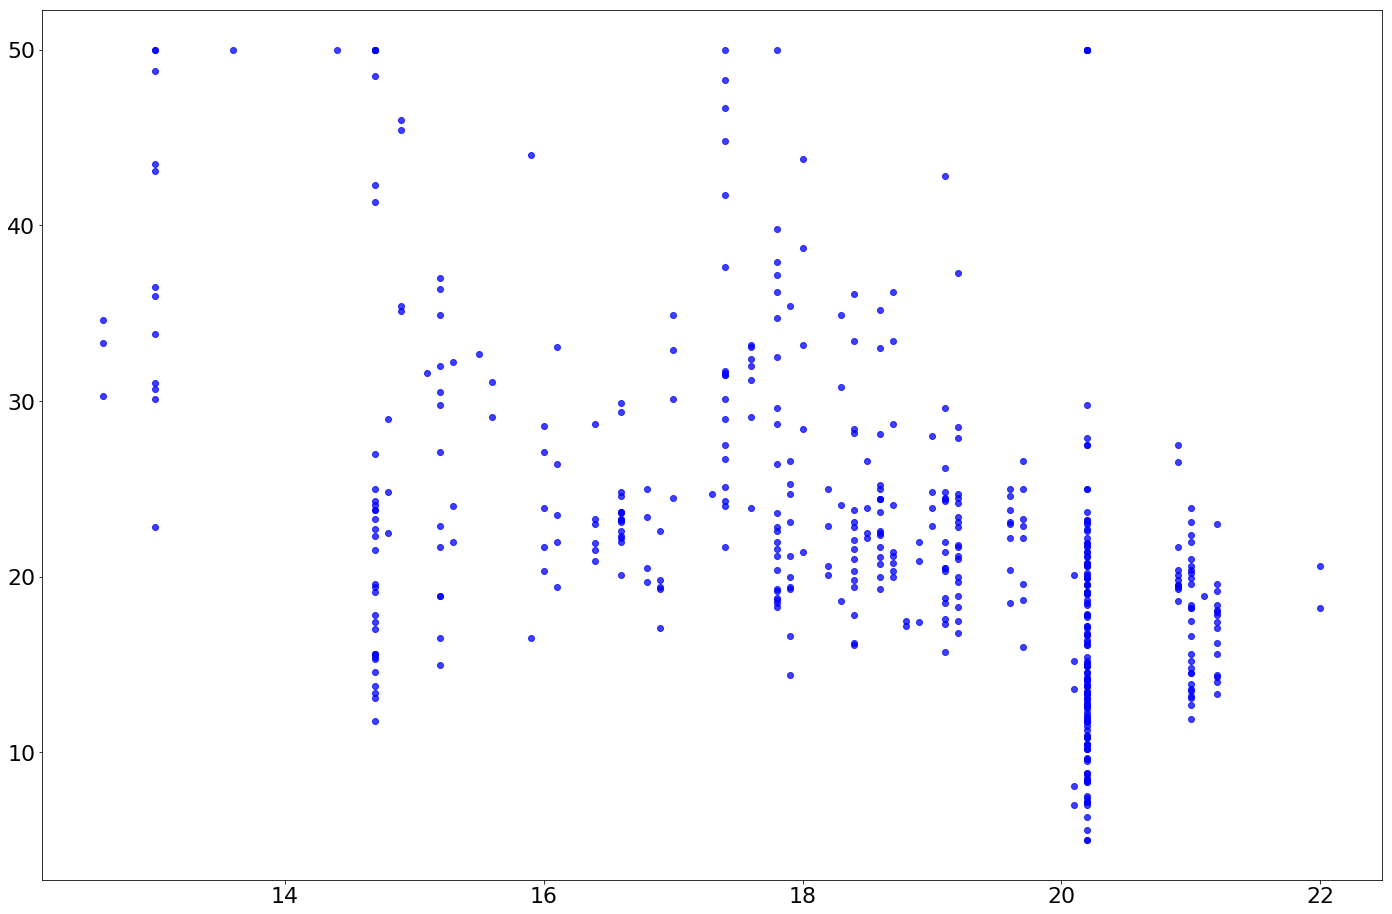

In [161]:
plt.scatter(df.PTRATIO.values, y,  c='b', alpha = 0.75)
plt.show()

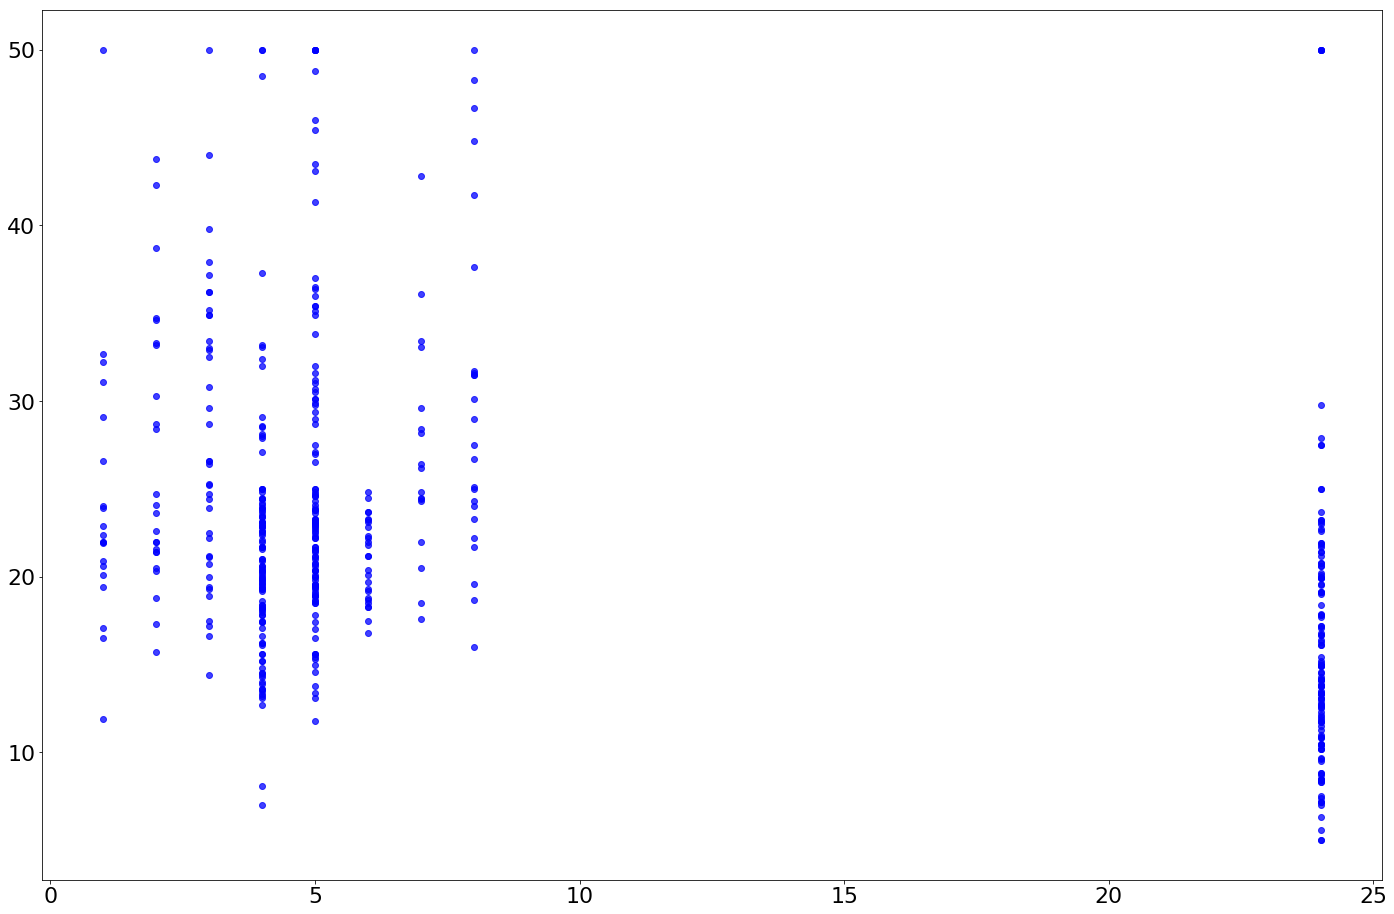

In [162]:
plt.scatter(df.RAD.values, y,  c='b', alpha = 0.75)
plt.show()

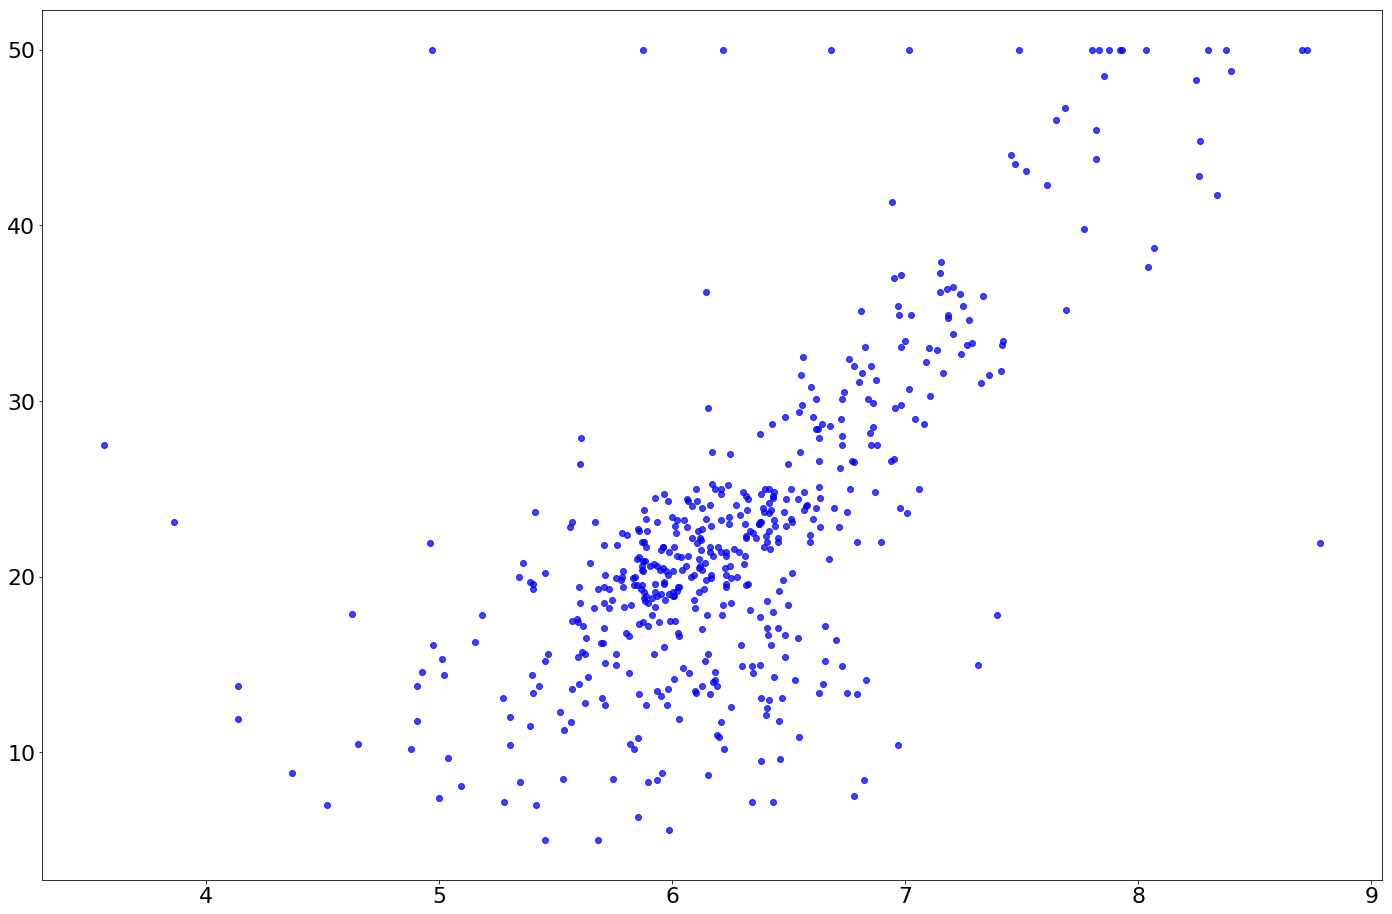

In [163]:
plt.scatter(df.RM.values, y,  c='b', alpha = 0.75)
plt.show()

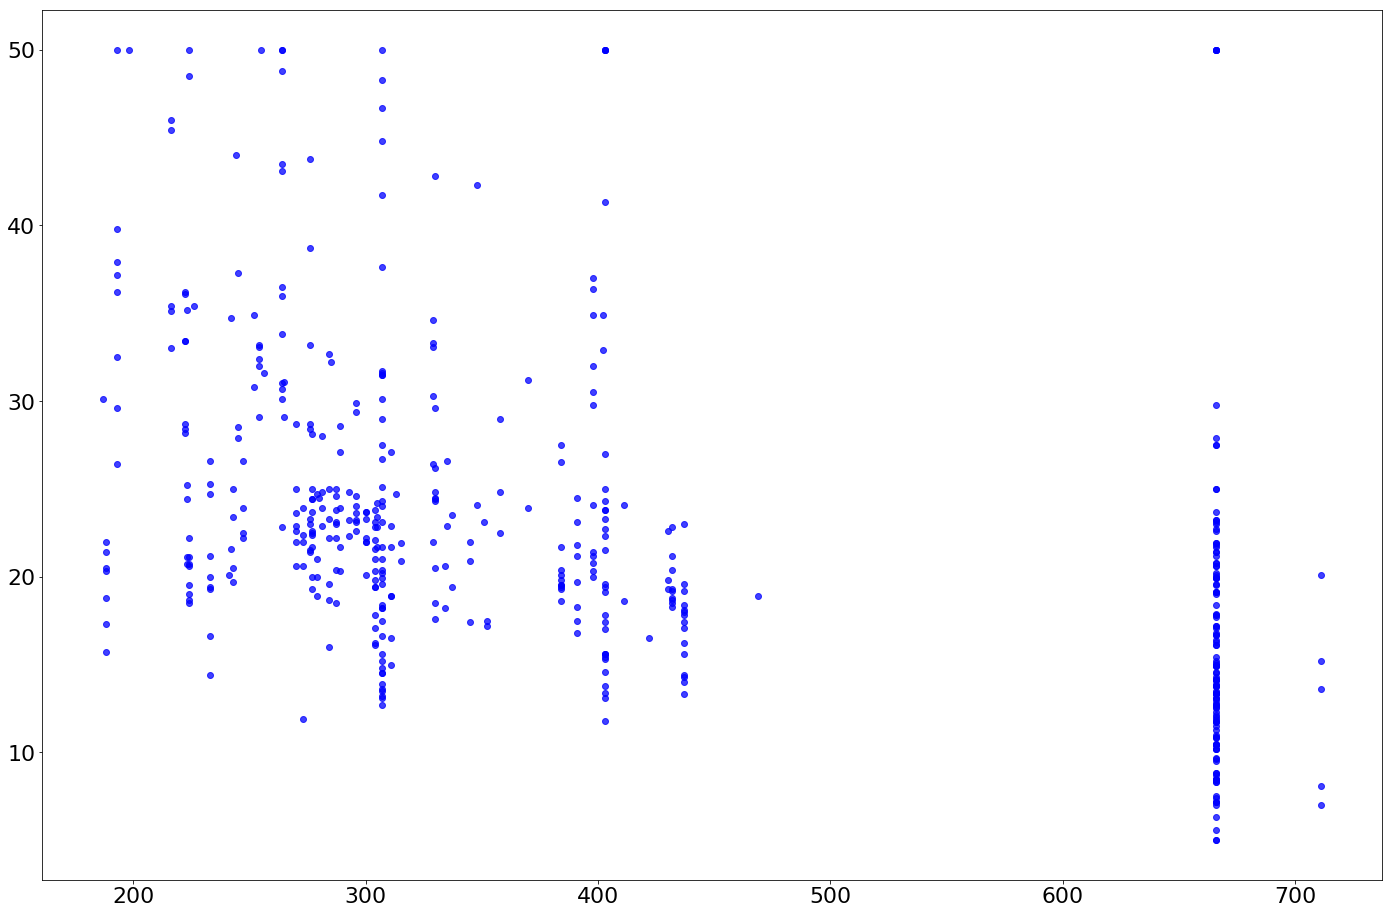

In [164]:
plt.scatter(df.TAX.values, y, c='b', alpha = 0.75)
plt.show()

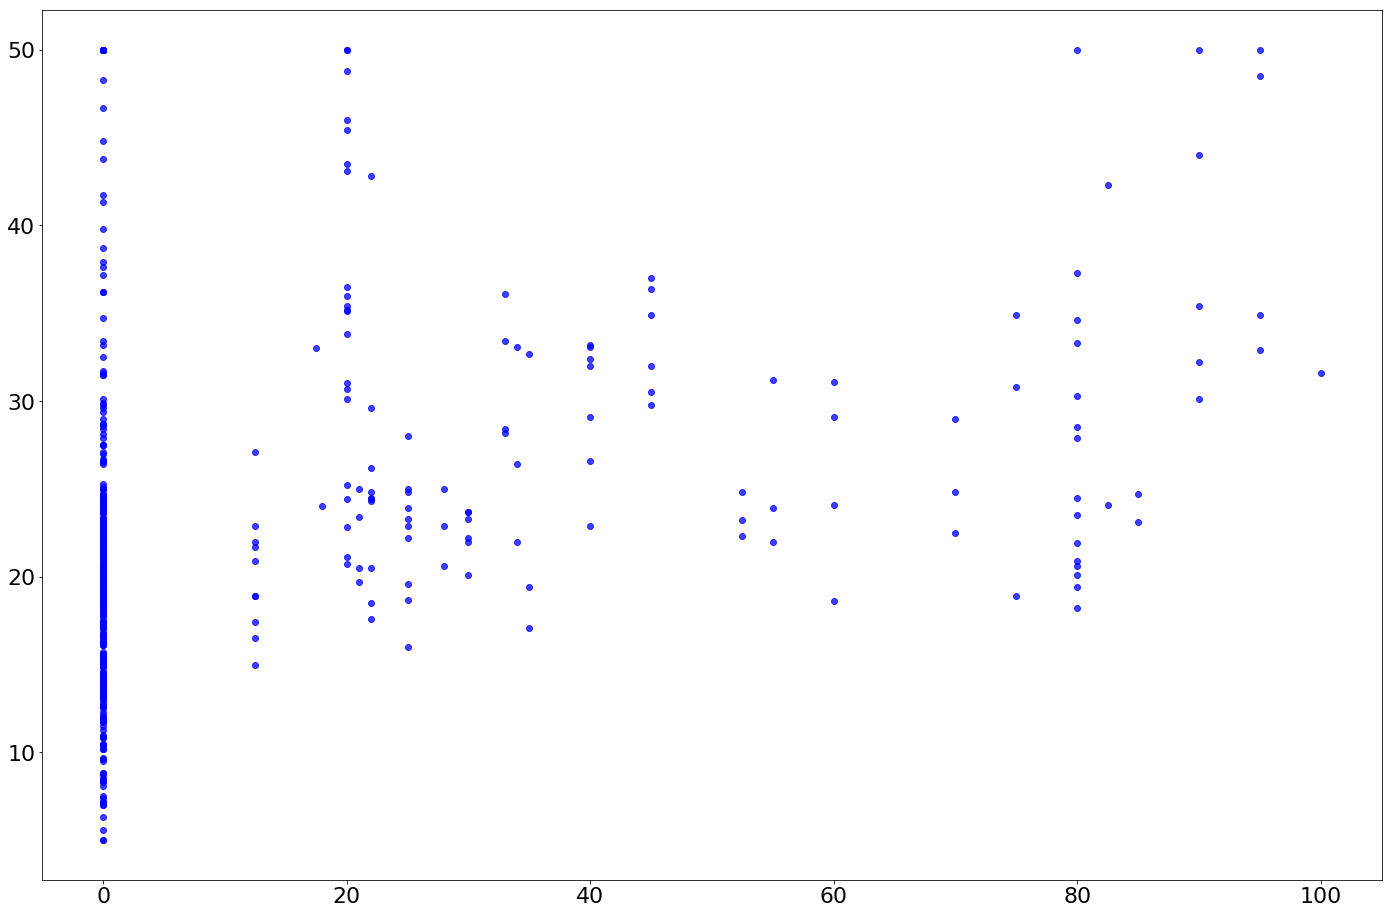

In [165]:
plt.scatter(df.ZN.values, y, c='b', alpha = 0.75)
plt.show()

##### 2. Обучить регрессию. (1 балл)

Обучите любую линейную регрессию из sklearn. Померить качество на тестовой части по метрикам RMSE, R2.

In [166]:
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.2, random_state=42)
# не меняйте рандом стейт! - он поможет сделать вычисления воспроизводимыми
scaller = StandardScaler()
scaller.fit(X_train)
X_train = scaller.transform(X_train)
X_test = scaller.transform(X_test)

In [167]:
regressor = LinearRegression()

In [168]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
y_pred = regressor.predict(X_test)

In [170]:
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.930661915979776, 0.6684825753971604)

##### 3. Сделайте крутую фичу. (1 балл)

Вернитесь к скатерплотам. Если вы правильно все построили - то вы увидите что один из признаков (LSTAT) как то зависит от y. Сделайте спрямляющее преобразование (добавьте новый признак) и обучите регрессию и померийте снова качество по метрикам RMSE, R2. если все сделали правильно, то кажется что оно должно вырасти

In [171]:
df_new = df.copy()
df_new['LSTAT_new'] = df.LSTAT ** 0.9

X_train, X_test, y_train, y_test = train_test_split(df_new.values, y, test_size=0.2, random_state=42)
scaller.fit(X_train)
X_train = scaller.transform(X_train)
X_test = scaller.transform(X_test)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.201526460957759, 0.7592811410869738)

> добейтесь качества по R2

- 0.751


##### 4. задание про кросс-валидацию 

выберите оптимальный параметр регуляризации на ridge с помощью кросс-валидации на трейне. померийте качество на тесте. Увеличелось ли оно на метриках?

In [172]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(alphas=[1e-5, 1e-3, 1e-2, 1e-1, 1, 10]).fit(X_train, y_train)
y_pre = ridge.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(4.201526460957759, 0.7592811410869738)

##### 5. задание про пайплайн

Используйте Pipeline из пакета sklearn.
сделайте поиск по параметрам (GridSearch), автоматически выберете какой способ нормировки признаков (минмакс скейлинг, стандарт скейлер) работает лучше, добавьте полиномиальных признаков, автоматически выберите модель (ридж лассо или просто регрессия) и регуляризацию к ней (если нужно).

In [173]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('polynom_features',PolynomialFeatures()), ('model', LinearRegression())])
parametrs = [{'scaler': [MinMaxScaler(), StandardScaler()], 'model': [LinearRegression(), Lasso(), Ridge()]}]

grid=GridSearchCV(pipeline,param_grid=parametrs, cv = 5)
grid.fit(X_train,y_train)

y_pred=grid.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)

(3.4443054301747487, 0.8382295391689293)

> добейтесь качества по R2

- 0.811
